# Comparing samples from normal distributions
authors: Maja H Kirkeby, Bernardo Santos, and João P. Fernandes

In this notebook we aim to show 
- whether or not there is a significant difference between two or more samples using the ANOVA individual test, and 
- in case there is a significant difference, we want to show whether the difference is positive or negative and whether it is considered large or not using Cohen's D and Hedge's G tests. 

*This requires (1) removing outliers, and (2) testing all the assumptions of the ANOVA tests.*

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import random

In [2]:
# import your file into a Pandas dataframe 
file_name = 'C.csv'
df = pd.read_csv(file_name, header = 0, delimiter=",", decimal=".", names=['test','PKG','CPU','nn','nn2','time'])

In [3]:
df

,test,PKG,CPU,nn,nn2,time
0,bubblesort,0.013184,0.010925,,,3.069
1,bubblesort,0.015198,0.009399,,,2.617
2,bubblesort,0.010559,0.009583,,,2.572
3,bubblesort,0.009949,0.009949,,,2.671
4,bubblesort,0.015381,0.010010,,,2.684
...,...,...,...,...,...,...
1435,bubblesort_ll,0.013184,0.014038,,,2.394
1436,bubblesort_ll,0.021362,0.014343,,,2.428
1437,bubblesort_ll,0.013672,0.014221,,,2.479
1438,bubblesort_ll,0.019531,0.014526,,,2.537


<Axes: xlabel='CPU', ylabel='time'>

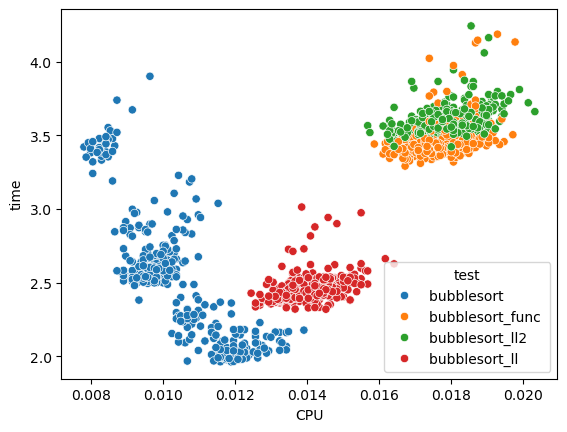

In [4]:
sns.scatterplot(data=df,hue='test',x='CPU', y='time')

<Axes: xlabel='CPU', ylabel='Count'>

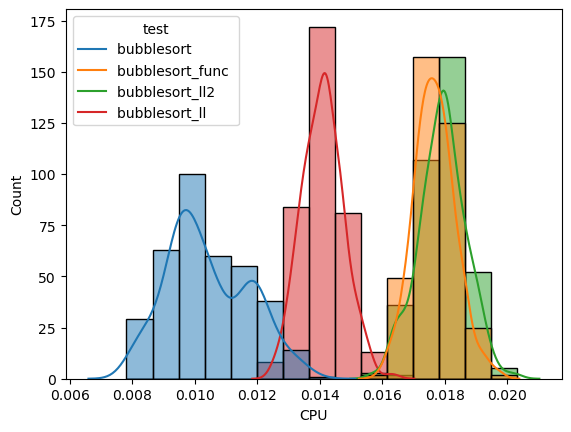

In [5]:
sns.histplot(data=df,hue='test',x='CPU')
sns.kdeplot(data=df,hue='test',x='CPU')

# Normal distribution test
https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [6]:
# create a subset of your data
# define the data source and how to separate the data
data = df
data_column = 'CPU'         # The column name with the data that we want to compare
types_column_name = 'test'  # The column name with the data in it
typeA = 'bubblesort_ll2 '  # The category of data A
typeB = 'bubblesort_func '       # The category of data B
typeC = 'bubblesort_ll '       # The category of data C
typeD = 'bubblesort '

#repetitions_of_random_sampling = 10000

# create a new dataframe with the interesting subset 
df_sampleA = data[(data[types_column_name]==typeA)][data_column]
df_sampleB = data[(data[types_column_name]==typeB)][data_column]
df_sampleC = data[(data[types_column_name]==typeC)][data_column]
df_sampleD = data[(data[types_column_name]==typeD)][data_column]


# create a new dataframe with the interesting subset 
sampleA = list(df_sampleA)
sampleB = list(df_sampleB)
sampleC = list(df_sampleC)
sampleD = list(df_sampleD)


# Removing outliers

number of outliers: 5 of 360 observations.
number of outliers: 6 of 360 observations.
number of outliers: 2 of 360 observations.
number of outliers: 0 of 360 observations.


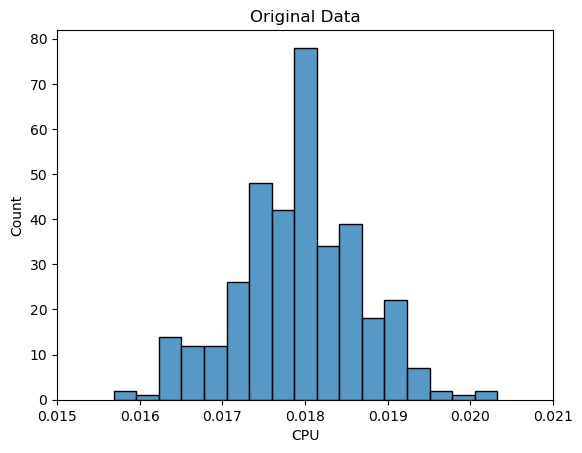

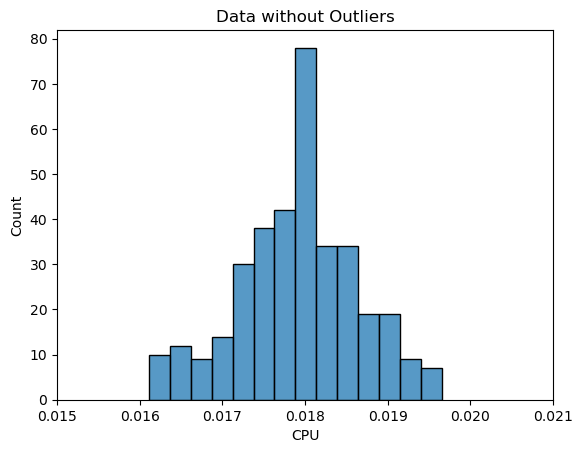

In [7]:
# Remove outliers from the initial data (per sample) 
# use quantile outliers when we do not have normal distributed data
def remove_outliers_quantile(data_series):
    data = data_series
    q75, q25 = data.quantile(q=0.75),data.quantile(q=0.25) # np.percentile(data.loc[:,data_column],[75,25])
    intr_qr = q75 - q25

    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)

    count_total = len(data)

    data = data[(data > min) & (data < max)]
    count_wo_outliers = len(data)

    outliers_count = count_total - count_wo_outliers
    print(f'number of outliers: {outliers_count} of {count_total} observations.')
    
    # remove outliers
    return data

df_sampleA = remove_outliers_quantile(df_sampleA)
df_sampleB = remove_outliers_quantile(df_sampleB)
df_sampleC = remove_outliers_quantile(df_sampleC)
df_sampleD = remove_outliers_quantile(df_sampleD)

# plot 
sns.histplot(data=data[(data[types_column_name]==typeA)][data_column]).set(title='Original Data',xlim=(0.015,0.021))
plt.show()
sns.histplot(data=df_sampleA).set(title='Data without Outliers',xlim=(0.015,0.021))
plt.show()

## Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.

In [8]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
#data = sampleA
#data = sampleB
data = sampleC
#data = sampleD
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.995, p=0.269
Probably Gaussian


## D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions**:
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution

In [9]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
#data = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
data = sampleD
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=20.303, p=0.000
Probably not Gaussian


## Anderson-Darling Test
Tests whether a data sample has a Gaussian distribution.

**Assumptions:**
Observations in each sample are independent and identically distributed (iid).

**Interpretation:**
- H0: the sample has a Gaussian distribution.
- H1: the sample does not have a Gaussian distribution.


In [10]:
# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson
# seed the random number generator
seed(1)
# generate univariate observations
data = sampleB
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.471
15.000: 0.570, data looks normal (fail to reject H0)
10.000: 0.649, data looks normal (fail to reject H0)
5.000: 0.779, data looks normal (fail to reject H0)
2.500: 0.908, data looks normal (fail to reject H0)
1.000: 1.080, data looks normal (fail to reject H0)


## Sample size determination - Cochranes formula:

### z-score:
assumes normal distribution of data

| Confidence level | z-score | 
| --- | --- |
| 80% | 1.282 |
| 90% | 1.645 |
| 95% | 1.960 |
| 98% | 2.326 |
| 99% | 2.576 |


In [11]:
z_score = {80:1.282, 90:1.645, 95:1.960, 98:2.326, 99:2.576}

confidence_level = 95

z = z_score[confidence_level]  # z-score
p = 0.5 # maximum variability
q = 1-p
e = (100-confidence_level)/100

n0 = (z**2 * p * q)/e**2
print(f"number of samples when we do not have any knowledge: {n0}")


number of samples when we do not have any knowledge: 384.1599999999999


In [12]:
# when the standard deviation is known
sigma = df_sampleD.std()

n0 = z**2 * sigma * (1-sigma) /  e**2
print(f"number of samples when the std deviation is {sigma}: {n0}")

number of samples when the std deviation is 0.0013165129429564876: 2.020343134491305


## Lavene's test
https://pyshark.com/levenes-test-for-equality-of-variances-explained-with-python-examples/

Tests whether the observations in each sample have the same variance.

**Interpretation**
- H0: The null hypothesis of Levene’s test is that all groups have equal variances.
- H1: The alternative hypothesis of Levene’s test is that at least one pair of groups has unequal variances.


In [13]:
from scipy.stats import levene
stat, p_value = levene(sampleA, sampleB)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

if p > 0.05:
	print('Cannot reject the null hypothesis: all groups probably have equal variances')
else:
	print('Reject the null hypothesis: at least one pair of groups has unequal variances')


Lavene's test statistic: 4.237641586117139
P-value: 0.03989732988270548
Cannot reject the null hypothesis: all groups probably have equal variances


# Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.

**Assumptions:**
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

**Interpretation**
- H0: the means of the samples are equal.
- H1: one or more of the means of the samples are unequal.

In [14]:
# Example of the Analysis of Variance Test
from scipy.stats import f_oneway
data1 = sampleA
data2 = sampleB
data3 = sampleC
stat, p = f_oneway(data1, data2,data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=3380.867, p=0.000
Probably different distributions


# Effect Sizes
A p-value can tell us whether or not there is a statistically significant difference between two groups, and an effect size can tell us the size of this difference.



## Cohen's d
https://machinelearningmastery.com/effect-size-measures-in-python/

Cohen’s d measures the difference between the mean from two Gaussian-distributed variables. It is a standard score that summarizes the difference in terms of the number of standard deviations. Because the score is standardized, there is a table for the interpretation of the result, summarized as:

- Small Effect Size: d=0.20
- Medium Effect Size: d=0.50
- Large Effect Size: d=0.80


In [15]:


# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

cohend(sampleA,sampleC)

np.float64(5.349844414046972)

## Hedge's g
https://www.statology.org/hedges-g/ 

The only difference between Cohen’s d and Hedges’ g is that Hedges’ g takes each sample size into consideration when calculating the overall effect size.

Thus, it’s recommended to use Hedge’s g to calculate effect size when the two sample sizes are not equal.

If the two sample sizes are equal then Hedges’ g and Cohen’s d will be the exact same value.

Following is inspired by https://rowannicholls.github.io/python/statistics/effect_size.html#hedgess-g

In [16]:

def effect_size(data_series1, data_series2):
    data1= data_series1
    data2= data_series2
    
    # degrees of freedom
    n1 = data1.count()
    n2 = data1.count()
    dof = n1+n2-2
    
    # Variances
    var1 = data1.var()
    var2 = data2.var()

    # Difference of the means
    mean1 = data1.mean()
    mean2 = data2.mean()    
    diff_mean = mean1-mean2

    # Pooled standard deviation
    s_pooled_star = np.sqrt((((n1 - 1) * var1) + ((n2 - 1) * var2)) / dof)

    # Hedges's g
    hedgess_g = diff_mean / s_pooled_star

    print(f"Hedges's g = {hedgess_g:.3f}")
    
effect_size(df_sampleC,df_sampleA)

Hedges's g = -5.598
